In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from sympy.physics.units import *
from sympy import init_session
init_session()

%matplotlib inline

IPython console for SymPy 1.13.1 (Python 3.11.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.1/



## Q1: Play with expressions

Create the expression:

$$f = x e^{-x} + x (1-x)$$

Then evaluate it for 

$$x = 0, 0.1, 0.2, 0.4, 0.8$$

In [2]:
x = symbols("x")
f = x * exp(-x) + x*(1-x)
f

In [3]:
x_values = [0, 0.1, 0.2, 0.4, 0.8]

for i in x_values:
    print(f"f(x = {i}) = {f.subs(x, i)}")

f(x = 0) = 0
f(x = 0.1) = 0.180483741803596
f(x = 0.2) = 0.323746150615596
f(x = 0.4) = 0.508128018414256
f(x = 0.8) = 0.519463171293777


## Q2: Polynomials

Factor this polynomial

$$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

Then find its zeros.

In [4]:
x = symbols("x")
f = x**4 - 6*x**3 + x**2 + 24*x + 16
f

In [5]:
factor(f)

In [6]:
f_roots = roots(f)

for keys, values in f_roots.items():
    print(f"Root: {keys}, Degeneracy: {values}")

Root: 4, Degeneracy: 2
Root: -1, Degeneracy: 2


## Q3: There and back again 
Integrate the function:

$$f = \sin(x) e^{-x}$$

Then differentiate the result to see if you get back the original function

In [7]:
x = symbols("x")
f = sin(x) * exp(-x)
f

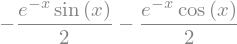

In [8]:
g = integrate(f)
g

In [9]:
diff(g, x)

## Q4: Parsing an expression

Write a program that reads in a mathematical expression as a string (e.g., `"sin(2*pi*x)"`), converts it to a sympy expression, and then evaluates it as needed.  

Have your program either make a plot of the entered function, or use the input function as the function to fit a dataset to using curvefit.

The following will be helpful:

`parse_expr()` will convert a string into a SymPy expression

In [10]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [11]:
s = "sin(2*pi*x)"
a = parse_expr(s)
a

`sympy.lambdify()` will convert a sympy expression into a function that is callable by python.  You can make it a numpy-compatible function too (this means, e.g., that any `sin()` in your SymPy expression will be evaluate using `np.sin()`)

In [12]:
f = lambdify(x, a, "numpy")

In [13]:
f(1.0)

Write down your f(x):  cos(x)*exp(-x/50)
Enter the minimum value of x:  0
Enter the maximum value of x:  200
Enter the total number of points:  500


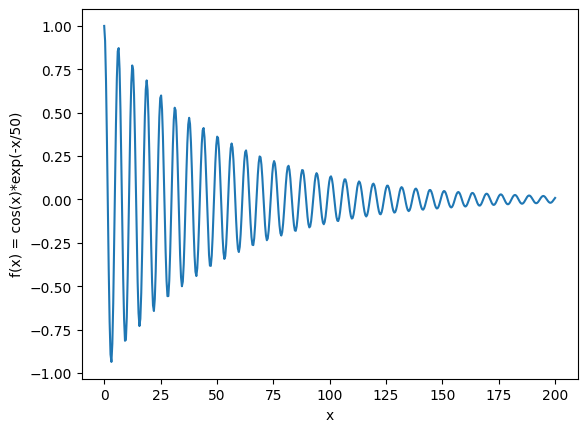

In [14]:
def parse(string, values):
    f = parse_expr(string)
    return lambdify(*f.free_symbols, f, "numpy")(values)


f = input("Write down your f(x): ")
x_min = float(input("Enter the minimum value of x: "))
x_max = float(input("Enter the maximum value of x: "))
x_tot = int(input("Enter the total number of points: "))

x = np.linspace(x_min, x_max, x_tot)
y = parse(f, x)

fig = plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel(f"f(x) = {f}")
plt.show()

## Q5: Let's go back to high school

Newton's 2nd law is

$$F = ma$$

Create a mass of 1 kg and an acceleration of 10 m/s$^2$, and compute the force, $F$, and express the result in Newtons.

Note: the `convert_to` function was added in SymPy 1.1, so if you are using an earlier version, you will need to divide by the target unit to do the conversion.

In [15]:
m, a = symbols("m a")
F = m * a
F

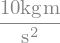

In [16]:
mass = 1 * kilogram
acceleration = 10 * meter / (second**2)
eval = F.subs({m: mass, a: acceleration})
eval

In [17]:
convert_to(eval, newton)